In [ ]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as pt

In [2]:
def generate_one_episode(center, p_r=0.5):
    left = 0
    right = 2*center
    state = center
    episode = []
    while (state>left) and (state<right):
        next_state = state+1 if npr.uniform()<=p_r else state-1
        reward = 1 if next_state==right else 0
        episode.append((state, reward))
        state = next_state
    return episode

In [3]:
def monte_carlo_first_visit_prediction(n_episode, center, gamma=1, p_r=0.5):
    returns = np.ones(center*2+1)*0.5
    returns[0] = 0
    returns[-1] = 1
    counts = np.zeros(center*2+1)
    counts[0] = 1
    counts[-1] = 1
    rmse = np.zeros(n_episode)
    value_true = np.array([(j+1)/2/center for j in range(2*center-1)])
    for j in range(n_episode):
        episode = generate_one_episode(center, p_r)[::-1]
        states = [x[0] for x in episode]
        G = 0
        for i, (s, r) in enumerate(episode):
            G = r+gamma*G
            if s not in states[i+1:]:
                returns[s] += G
                counts[s] += 1
        value = returns/counts
        rmse[j] = np.mean((value[1:-1]-value_true)**2)
    return value, rmse

In [4]:
def temporal_difference_prediction(n_episode, center, gamma=1, alpha=0.1, p_r=0.5):
    value = np.ones(center*2+1)*0.5
    value[0] = 0
    value[-1] = 1
    rmse = np.zeros(n_episode)
    value_true = np.array([(j+1)/2/center for j in range(2*center-1)])
    for j in range(n_episode):
        episode = generate_one_episode(center, p_r)
        length = len(episode)
        for i in range(length):
            next_value = 0 if i==length-1 else value[episode[i+1][0]]
            value[episode[i][0]] += alpha*(episode[i][1]+gamma*next_value-value[episode[i][0]])
        rmse[j] = np.mean((value[1:-1]-value_true)**2)
    return value, rmse

In [5]:
def constant_alpha_monte_carlo_first_visit_prediction(n_episode, center, alpha=0.1, gamma=1, p_r=0.5):
    value = np.ones(center*2+1)*0.5
    value[0] = 0
    value[-1] = 1
    rmse = np.zeros(n_episode)
    value_true = np.array([(j+1)/2/center for j in range(2*center-1)])
    for j in range(n_episode):
        episode = generate_one_episode(center, p_r)[::-1]
        states = [x[0] for x in episode]
        G = 0
        for i, (s, r) in enumerate(episode):
            G = r+gamma*G
            if s not in states[i+1:]:
                value[s] += alpha*(G-value[s])
        rmse[j] = np.mean((value[1:-1]-value_true)**2)
    return value, rmse

In [6]:
value_mcfv, rmse_mcfv = monte_carlo_first_visit_prediction(10000, 3)

print(rmse_mcfv[-1])
for i in range(len(value_mcfv)):
    print(i, value_mcfv[i], i/(len(value_mcfv)-1))

/Users/ctchiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


1.3317877186980338e-05
0 0.0 0.0
1 0.1651247315380803 0.16666666666666666
2 0.3299522673031026 0.3333333333333333
3 0.49465 0.5
4 0.6620934279212957 0.6666666666666666
5 0.8351342225223705 0.8333333333333334
6 1.0 1.0


In [10]:
value_td_1, rmse_td_1 = temporal_difference_prediction(10000, 3, alpha=0.05)
value_td_2, rmse_td_2 = temporal_difference_prediction(10000, 3, alpha=0.1)
value_td_3, rmse_td_3 = temporal_difference_prediction(10000, 3, alpha=0.15)

In [11]:
value_mc_1, rmse_mc_1 = constant_alpha_monte_carlo_first_visit_prediction(10000, 3, alpha=0.01)
value_mc_2, rmse_mc_2 = constant_alpha_monte_carlo_first_visit_prediction(10000, 3, alpha=0.02)
value_mc_3, rmse_mc_3 = constant_alpha_monte_carlo_first_visit_prediction(10000, 3, alpha=0.03)
value_mc_4, rmse_mc_4 = constant_alpha_monte_carlo_first_visit_prediction(10000, 3, alpha=0.04)

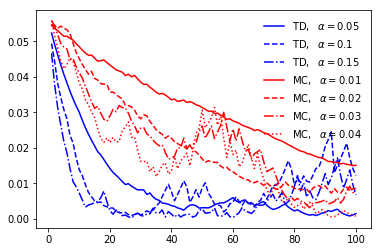

In [12]:
max_episode = 100
episode = np.arange(max_episode)+1

pt.figure(1)
pt.plot(episode, rmse_td_1[:max_episode], 'b-', label=r'${\rm TD},\ \ \alpha=0.05$')
pt.plot(episode, rmse_td_2[:max_episode], 'b--', label=r'${\rm TD},\ \ \alpha=0.1$')
pt.plot(episode, rmse_td_3[:max_episode], 'b-.', label=r'${\rm TD},\ \ \alpha=0.15$')
pt.plot(episode, rmse_mc_1[:max_episode], 'r-', label=r'${\rm MC},\ \ \alpha=0.01$')
pt.plot(episode, rmse_mc_2[:max_episode], 'r--', label=r'${\rm MC},\ \ \alpha=0.02$')
pt.plot(episode, rmse_mc_3[:max_episode], 'r-.', label=r'${\rm MC},\ \ \alpha=0.03$')
pt.plot(episode, rmse_mc_4[:max_episode], 'r:', label=r'${\rm MC},\ \ \alpha=0.04$')
pt.legend(loc='upper right', frameon=False)
pt.show()